In [ ]:
#to do in local
#from os import listdir
#from os.path import isfile, join
#onlyfiles = [f for f in listdir("C:/Users/Kabar/Desktop/tweets") if isfile(join("C:/Users/Kabar/Desktop/tweets", f))]

#import pandas as pd

#df = pd.DataFrame({'tw_name':onlyfiles})
#df.to_csv("twitter_name", index = False)

In [2]:
!pip install fa2
!pip install python-louvain

    100% |████████████████████████████████| 81kB 6.3MB/s 
  Running setup.py bdist_wheel for fa2 ... done
  Stored in directory: /root/.cache/pip/wheels/39/c7/0c/a62ea06fc84864edeecf6f7501f3bebcf38f47dbedbe46187a
Successfully built fa2
  Running setup.py bdist_wheel for python-louvain ... done
  Stored in directory: /root/.cache/pip/wheels/c3/b0/db/198c7453d5169907dbdbb090eebc0c6839f75e36b09c6dc7aa
Successfully built python-louvain


In [ ]:
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import re
import nltk
import pylab
from pylab import rcParams
import urllib2
import json
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import math
import community
from fa2 import ForceAtlas2

In [4]:
import io
from google.colab import files
uploaded = files.upload()
party = pd.read_csv(io.StringIO(uploaded['H115_tw.csv'].decode('utf-8')))

Saving H115_tw.csv to H115_tw.csv


In [8]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 22280 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.0-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.0-0ubuntu1~ubuntu18.04.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleus

### Sacha

In [8]:
path_collab = "DTU/SG/Ex"
import os
os.path.isfile("drive/"+path_collab)
!mkdir drive
!google-drive-ocamlfuse drive
!ls drive/"DTU/SG/Ex"

democratic.txt	trump.png	  Week6Collab.ipynb  wiki_data
hillary.jpg	tweets		  Week7.ipynb	     wiki_data2
republican.txt	twitter_name.csv  Week8.ipynb


### Tom

In [9]:
path_collab = "Denmark/SG"
import os
os.path.isfile("drive/"+path_collab)
!mkdir drive
!google-drive-ocamlfuse drive
!ls drive/"Denmark/SG"

mkdir: cannot create directory ‘drive’: File exists
democratic.txt	republican.txt	tweets	twitter_name.csv  wiki_data


### Miria

In [5]:
path_collab = "Uni/Social Graphs and Interactions/Week8"
import os
os.path.isfile("drive/"+path_collab)
!mkdir drive
!google-drive-ocamlfuse drive
!ls drive/"Uni/Social Graphs and Interactions/Week8"

tweets	twitter_name.csv  Week8.ipynb



# Part 1: Twitter Network Analysis
## Exercise 1: Build the network of retweets. 
>We will now build a network that has as nodes the Twitter handles of the members of the house, and direct edges between nodes A and B if A has retweeted content posted by B. We will build a weighted network, where the weight of an edge is equal to the number of retweets. You can build the network following the steps below (and you should be able to reuse many of the functions you wrote in previous weeks):

> * Consider the 200 most recent tweets written by each member of the house (use the files here, or the ones you produced in Part 1). For each file, use a regular expression to find retweets and to extract the Twitter handle of the user whose content was retweeted. All retweets begin with "RT @originalAuthor:", where "originalAuthor" is the handle of the user whose content was retweeted (and the part of the text you want to extract).
* For each retweet, check if the handle retweeted is the one of a member of the house. If yes, keep it. If no, discard it.
* Use a NetworkX DiGraph to store the network. Use weighted edges to account for multiple retweets. Store also the party of each member as a node attribute (use the data in this file, or the data you downloaded in Part 1). Remove self-loops (edges that connect a node with itself).

In [ ]:
import collections
import networkx as nx

liste = list(party.tw_name)
liste_temp = []

G=nx.DiGraph()

degree_map = []


for i in range(len(party)):
  
  G.add_node(party.tw_name[i], Party =  party.Party[i] )
  
  liste_temp = []
  weight = 0
  
  file = open("drive/"+path_collab +'/tweets/'+party.tw_name[i],'rbrb')
  
  # Regular expression to find retweets
  raw = file.read()
  pattern = "RT @(\w+)"
  groups = re.findall(pattern, raw)
  
  # We keep only the representatives that we put into the liste_temp   
  for j in groups:
    if liste.count(j) > 0:
      liste_temp.append(j)
      
  # Remove self-loops
  liste_temp = list(filter(lambda a: a != party.tw_name[i], liste_temp))
  
  #or the guy with no friend we have a test
  if len(liste_temp) > 0 :
    
    # we use a collection for the weight
    count_rt = collections.Counter(liste_temp) 
    df = pd.DataFrame.from_dict(count_rt, orient='index').reset_index()
    df.columns = ['tw_name',"rt"]

    for k in range(len(df)):
      G.add_edge(party.tw_name[i],df.tw_name[k],weight=df.rt[k])
      
      #keep track of the weight for next question
      weight = weight + df.rt[k]
      
  party.loc[i, 'weight'] = weight  

In [ ]:
degree_map = []

for i in range(len(G.nodes)):
  
  degree_map.append(G.degree(party.tw_name[i]))

##  _Exercise_ 2: Visualize the network of retweets and investigate differences between the parties.
> * Visualize the network using the [Networkx draw function](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw), and nodes coordinates from the force atlas algorithm (see Week 5, Exercise 2). _Hint: use the undirected version of the graph to find the nodes positions for better results, but stick to the directed version for all measurements._ Plot nodes in colors according to their party (e.g. 'red' for republicans and 'blue' for democrats) and set the nodes' size proportional to their total degree. 

In [ ]:
color_map = []

for i in range(len(party)):
    
    if party['Party'].iloc[i] == "Democratic":
        color_map.append('blue')
    else: 
        color_map.append('red')

In [ ]:
color_map = []
Gc = max(nx.connected_component_subgraphs(G.to_undirected()), key=len)

parties = nx.get_node_attributes(Gc,"Party")
for p in parties.values():
  if p == "Democratic":
    color_map.append("blue")
  else:
    color_map.append("red")

100%|██████████| 2500/2500 [00:07<00:00, 315.34it/s]


('BarnesHut Approximation', ' took ', '2.12', ' seconds')
('Repulsion forces', ' took ', '4.76', ' seconds')
('Gravitational forces', ' took ', '0.05', ' seconds')
('Attraction forces', ' took ', '0.27', ' seconds')
('AdjustSpeedAndApplyForces step', ' took ', '0.25', ' seconds')


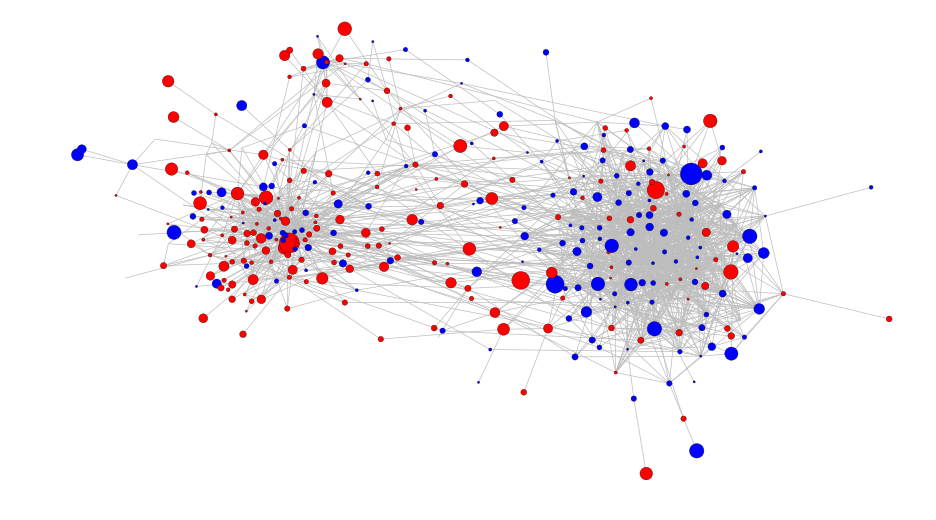

In [21]:
from fa2 import ForceAtlas2


forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=2,

                          # Performance
                          jitterTolerance=0.9,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=1.2,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=5.0,
                          strongGravityMode=False,
                          gravity=3.0,

                          # Log
                          verbose=True)

# change the area of the plot
plt.rcParams["figure.figsize"] = [16,9]

# apply forceatlas and draw
positions = forceatlas2.forceatlas2_networkx_layout(Gc, pos=None, iterations=2500)
nx.draw_networkx(Gc, positions, width=0.7,edge_color = "#bdbdbd", cmap=plt.get_cmap('jet'), node_size = [v * 5 for v in degree_map], with_labels=False, node_color = color_map)

# set node outlines to black
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000")  

#removes the axis and brackgound grid from the plot
plt.grid('off')
plt.axis('off')
plt.show()

>   * Compare the network of Retweets with the network of Wikipedia pages (Week 5, exercise 2). Do you observe any difference? How do you explain them? 

The major difference is that from the wiki data we got just one big cluster containing a mix of republicans and democrats while from the twitter data we got two larger clusters. One mostly containing democrats and the other one mostly containing republicans. This might be due to wikipedia being a more neutral than twitterdata and therefore people are linked more based on which they work with instead of which who they share oppinions with.


> * Now set the nodes' size proportional to their betweenness centrality. What do you observe?

100%|██████████| 3000/3000 [00:09<00:00, 304.61it/s]


('BarnesHut Approximation', ' took ', '2.82', ' seconds')
('Repulsion forces', ' took ', '5.86', ' seconds')
('Gravitational forces', ' took ', '0.07', ' seconds')
('Attraction forces', ' took ', '0.33', ' seconds')
('AdjustSpeedAndApplyForces step', ' took ', '0.31', ' seconds')


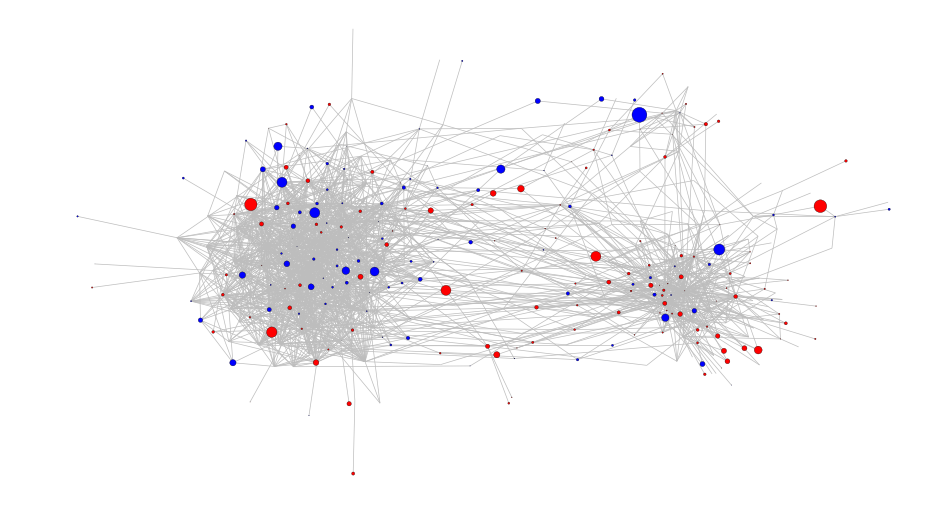

In [83]:

dict_between = dict(nx.betweenness_centrality(G))
positions = forceatlas2.forceatlas2_networkx_layout(Gc, pos=None, iterations=3000)
nx.draw_networkx(Gc, positions, width=0.7,edge_color = "#bdbdbd", cmap=plt.get_cmap('jet'), node_size = [v * 2000 for v in list(dict_between.values())], with_labels=False, node_color = color_map)

ax = plt.gca() 
ax.collections[0].set_edgecolor("#000000")

plt.grid('off')
plt.axis('off')
plt.show()

From the graph it's obvious that the republicans have a more nodes with a large amount of betweenness centrality compared to the democrats. Betweenness centrality in this cased is based on how much a person gets retweeted and retweet leading to the conclusion that republican house representativs are more active twitter users.



> * Repeat the point above using eigenvector centrality instead. Is there any difference? Can you explain why?

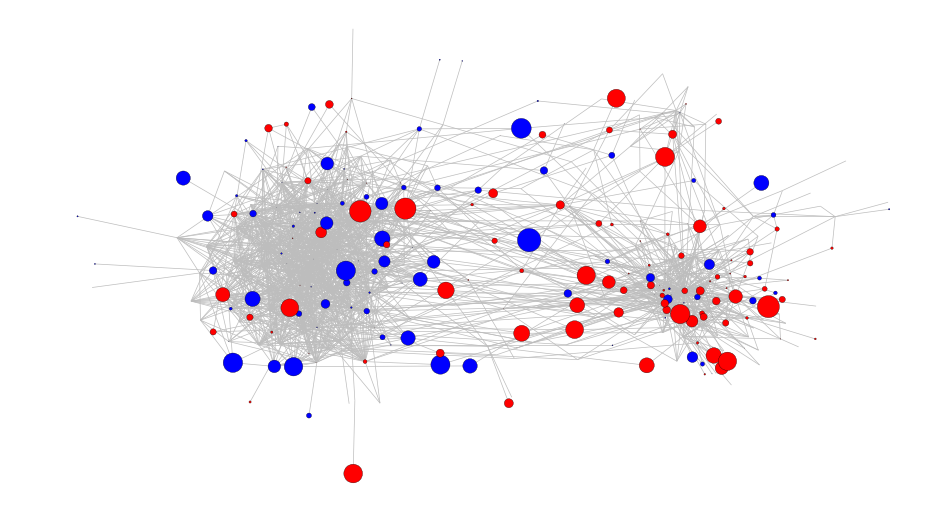

In [84]:
dict_eigen = dict(nx.eigenvector_centrality(G))
nx.draw_networkx(Gc, positions, width=0.7,edge_color = "#bdbdbd", cmap=plt.get_cmap('jet'), node_size = [v * 2000 for v in list(dict_eigen.values())], with_labels=False, node_color = color_map)

ax = plt.gca() 
ax.collections[0].set_edgecolor("#000000")

plt.grid('off')
plt.axis('off')
plt.show()

There is a huge difference. This is because the people with high degrees tend to connect to other nodes with high degrees.



> * Who are the three nodes with highest degree within each party? And eigenvector centrality? And betweenness centrality?

In [ ]:
republicans_nodes = [x for x,y in nx.get_node_attributes(G, "Party").iteritems() if y == "Republican"]
democratics_nodes = [x for x,y in nx.get_node_attributes(G, "Party").iteritems() if y == "Democratic"]

In [23]:
##########################
#Republican
##########################

#highest degree

dict_republicans = dict(G.degree(republicans_nodes))
df_republicans = pd.DataFrame.from_dict(dict_republicans, orient='index')
df_republicans.columns =["nb"]
print(df_republicans.sort_values(by=['nb'], ascending=False).head(3))


#eigenvector centrality

dict_republicans = dict(nx.eigenvector_centrality(G))
df_republicans = pd.DataFrame.from_dict(dict_republicans, orient='index')
df_republicans.columns =["nb"]
df_republicans['index'] = df_republicans.index
df_republicans = df_republicans[df_republicans.index.isin(republicans_nodes)]

print(df_republicans.sort_values(by=['nb'], ascending=False).head(3))


#betweenness centrality

dict_republicans = dict(nx.betweenness_centrality(G))
df_republicans = pd.DataFrame.from_dict(dict_republicans, orient='index')
df_republicans.columns =["nb"]
df_republicans['index'] = df_republicans.index
df_republicans = df_republicans[df_republicans.index.isin(republicans_nodes)]

print(df_republicans.sort_values(by=['nb'], ascending=False).head(3))

              nb
SpeakerRyan   95
SteveScalise  80
GOPLeader     42
                    nb         index
RosLehtinen   0.040772   RosLehtinen
justinamash   0.029330   justinamash
RepFredUpton  0.021448  RepFredUpton
                      nb           index
SpeakerRyan     0.111113     SpeakerRyan
PatrickMcHenry  0.077009  PatrickMcHenry
SteveScalise    0.055045    SteveScalise


In [24]:
##########################
#Democratic
##########################

#highest degree

dict_democratics = dict(G.degree(democratics_nodes))
df_democratics = pd.DataFrame.from_dict(dict_democratics, orient='index')
df_democratics.columns =["nb"]
print(df_democratics.sort_values(by=['nb'], ascending=False).head(3))


#eigenvector centrality

dict_democratics = dict(nx.eigenvector_centrality(G))
df_democratics = pd.DataFrame.from_dict(dict_democratics, orient='index')
df_democratics.columns =["nb"]
df_democratics['index'] = df_democratics.index
df_democratics = df_democratics[df_democratics.index.isin(democratics_nodes)]

print(df_democratics.sort_values(by=['nb'], ascending=False).head(3))


#betweenness centrality

dict_democratics = dict(nx.betweenness_centrality(G))
df_democratics = pd.DataFrame.from_dict(dict_democratics, orient='index')
df_democratics.columns =["nb"]
df_democratics['index'] = df_democratics.index
df_democratics = df_democratics[df_democratics.index.isin(democratics_nodes)]

print(df_democratics.sort_values(by=['nb'], ascending=False).head(3))

              nb
NancyPelosi   65
repmarkpocan  64
WhipHoyer     60
                       nb            index
repmarkpocan     0.273884     repmarkpocan
RepRaulGrijalva  0.243451  RepRaulGrijalva
RepCummings      0.233585      RepCummings
                      nb           index
NancyPelosi     0.080558     NancyPelosi
RepDavidEPrice  0.060828  RepDavidEPrice
WhipHoyer       0.050290       WhipHoyer



> * Plot on the same figure the distribution of outgoing strength for the republican and democratic nodes (e.g. the sum of the weight on outgoing links). Which party is more active in retweeting other members of the house?


In [ ]:
df_republican = party[party.Party == "Republican"].sort_values(by=['weight'], ascending=True)
df_democratic = party[party.Party == "Democratic"].sort_values(by=['weight'], ascending=True)

df_republican_agg = df_republican.groupby(['weight']).size().to_frame('size').reset_index()
df_democratic_agg = df_democratic.groupby(['weight']).size().to_frame('size').reset_index()

### bins of five for republicans

In [ ]:
df_all = pd.DataFrame()


compteur = 1
flag = 0
for i in range(len(df_republican_agg)):
  if df_republican_agg.loc[i,'weight'] > compteur*5:
    compteur = compteur +1
    flag = 0
  
  if flag != 0 :
    df_all.loc[compteur-1,'size_republican'] = df_all.loc[compteur-1,'size_republican'] + df_republican_agg.loc[i, 'size']
    
  else :
    df_all.loc[compteur-1,'size_republican'] = df_republican_agg.loc[i, 'size']
    flag = 1
    
  


### bins of five for democratics

In [ ]:

compteur = 1
flag = 0
for i in range(len(df_democratic_agg)):
  if df_democratic_agg.loc[i,'weight'] > compteur*5:
    compteur = compteur +1
    flag = 0
  
  if flag != 0 :
    df_all.loc[compteur-1,'size_democratic'] = df_all.loc[compteur-1,'size_democratic'] + df_democratic_agg.loc[i, 'size']
    
  else :
    df_all.loc[compteur-1,'size_democratic'] = df_democratic_agg.loc[i, 'size']
    flag = 1

In [ ]:
df_all = df_all.fillna(0)

/usr/local/lib/python2.7/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


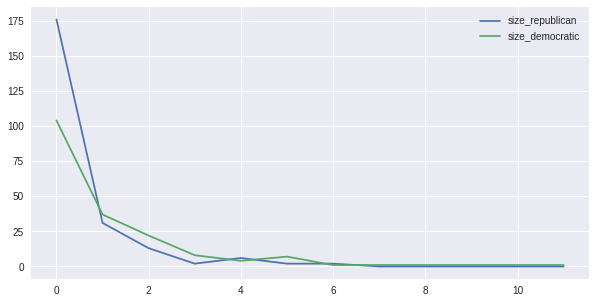

In [29]:
df_all.plot(x=df_all.index, y=['size_republican', 'size_democratic'], figsize=(10,5), grid=True)

From the graph we can deduce that Democrats are more active in retweeting each other overall than Republicans. This can be seen from the fact that the graph over Democrats activity is more flat, and has more people with higher activity than Republicans. The Republicans, however, have a higher amount of people with low activity in regards to retweeting other members of their party.


> * Find the 3 members of the republican party that have retweet more often tweets from democratic members. Repeat the measure for the democratic members. Can you explain your results by looking at the Wikipedia pages of these members of the house?

In [30]:
list(G.edges())[0]

('RepJerryNadler', 'janschakowsky')

In [ ]:

for i in range(len(party.tw_name)):
  to_other_party = 0
  n = party.tw_name[i]
  party_of_source = list(party[party["tw_name"].str.contains(n)]["Party"])[0]
  for e in G[n]:
    party_of_target = list(party[party["tw_name"].str.contains(e)]["Party"])[0]
    if not party_of_source == party_of_target:
      to_other_party += 1
  party.loc[i,"OtherPartyWeight"] = to_other_party    

In [32]:
df1 = party[party['Party'] == "Democratic"]
print(df1.sort_values(by=['OtherPartyWeight'], ascending=False).head(3))

          Party        tw_name  weight  OtherPartyWeight
324  Democratic  RepDebDingell    11.0               3.0
163  Democratic        jahimes     3.0               2.0
33   Democratic   RepAnnaEshoo    26.0               2.0


Debbie Dingell was acctually a Republican before she in 1981 became a Democrat. This could indicate that she still shares the same opinions as Republicans in some questions and therefore retweet them. 

Jim Himes is the chair of the New Democrat Coalition, a group of business-centric Democrats, and in May 2018, Himes voted with house republicans to fulfill Trump's campaign promise to roll back Obama era protections put in place to prevent another financial meltdown. If he votes with the republicans, he sure can retweet them. 

Anna Esho has worked with republicans in the past. For example when she together with Rep. Edward Markey, Eshoo introduced the Internet Freedom Preservation Act of 2009, which would make Net Neutrality the law. This could be reason we she has retweeted republicans. 

In [33]:
df2 = party[party['Party'] == "Republican"]
print(df2.sort_values(by=['OtherPartyWeight'], ascending=False).head(3))

          Party          tw_name  weight  OtherPartyWeight
226  Republican         RepDavid     7.0               7.0
321  Republican  RepRyanCostello     6.0               5.0
107  Republican    RepMikeTurner    10.0               4.0


David Schweikert which retweet the most from the other party is born in los angeles and he is having his polictical career in the state of arizona, two states with a strong democratic support the last elections. Therefore we think the chances are higher that chances that the retweet the other party. 

On Ryan Costellos Wikipedia page you can reas:
"In 2016, Democrat Mike Parrish challenged Costello. Hacked material from Parrish was leaked during the campaign, but the Costello campaign took the position that they would not use the illicitly obtained materials during the election." This debate could have led to him retweeting something from Mike Parrish.

By reading Mike Turners wiki page you can see that he has had some exchange with democrats trought the years. In 2006 Democratic Montgomery County Commissioner Dan Foley stated his support for Turner's comapnys bid on a contract. In October 2008, Turner joined then Senator Hillary Clinton, First Lady Laura Bush, Senator Pete Domenici and Rep. Brad Miller to announce the introduction of bipartisan legislation that would permanently authorize two historic preservation grant programs. This indicates that he has close connections with democrats and that is probably a reason why he is among the top3. 


 ## Exercise 3: Community detection.
> * Use your favorite method of community detection to find communities in the full house of representatives network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found for the Wikipedia network? Comment on your result.

    

In [12]:
G2 = G.to_undirected()

#first compute the best partition
partition = community.best_partition(G2)
print partition
# THE NUMBER IS THE COMMUNITY
print "The amount of communities is " + str(max(partition.values())+1)
# PLOT THE NETWORK WHERE EACH COMMUNITY HAS IT'S OWN COLOUR

print "Greedy modularity communit"

{'JimPressOffice': 3, 'RepJerryNadler': 0, 'repjimcooper': 1, 'RepStefanik': 1, 'RepGaramendi': 2, 'RepLouCorrea': 2, 'RepBetoORourke': 0, 'RepAlGreen': 0, 'RepTedDeutch': 0, 'RepWalorski': 8, 'RepTomRice': 3, 'RepRatcliffe': 8, 'chelliepingree': 0, 'RepBonnie': 0, 'RepKathleenRice': 1, 'RepSusanDavis': 4, 'RepJudyChu': 2, 'RepSpeier': 0, 'RepDevinNunes': 30, 'RepVisclosky': 5, 'RepJohnDelaney': 6, 'RepRaskin': 0, 'RepJayapal': 0, 'RepAndyBarr': 3, 'congbillposey': 6, 'nikiinthehouse': 0, 'RepMarshall': 31, 'RepCardenas': 0, 'RepGusBilirakis': 7, 'RepMarkTakano': 0, 'PeterRoskam': 3, 'DWStweets': 2, 'RepDeSaulnier': 0, 'RepJohnKatko': 3, 'RepMikeQuigley': 0, 'RepClayHiggins': 3, 'RepDwightEvans': 2, 'RepKHandel': 3, 'RepArrington': 6, 'RepRobWoodall': 3, 'RepDavid': 8, 'RepBonamici': 0, 'RepGrothman': 3, 'RepJasonSmith': 3, 'RepByrne': 3, 'RepGwenMoore': 0, 'RepBobGibbs': 3, 'RepSarbanes': 0, 'RepPaulTonko': 0, 'RepTimRyan': 0, 'USRepMikeDoyle': 0, 'DarrellIssa': 3, 'RepSires': 2, 'Rep

As can be seen, there are a lot more communities than there are parties in the network. As stated earlier, the Wikipedia network was largely one big cluster, containing both Democrats and Republicans. For the Twitter network, we have two big clusters, which already signifies a higher modularity than the Wikipedia network. Furthermore, the Twitter network has a lot of communities within these clusters, futhering the assumption that the Twitter network has a higher modularity than the Wikipedia network


> * Visualize the network, using the Force Atlas algorithm (see Lecture 5, exercise 2). This time assign each node a different color based on their _community_. Describe the structure you observe.


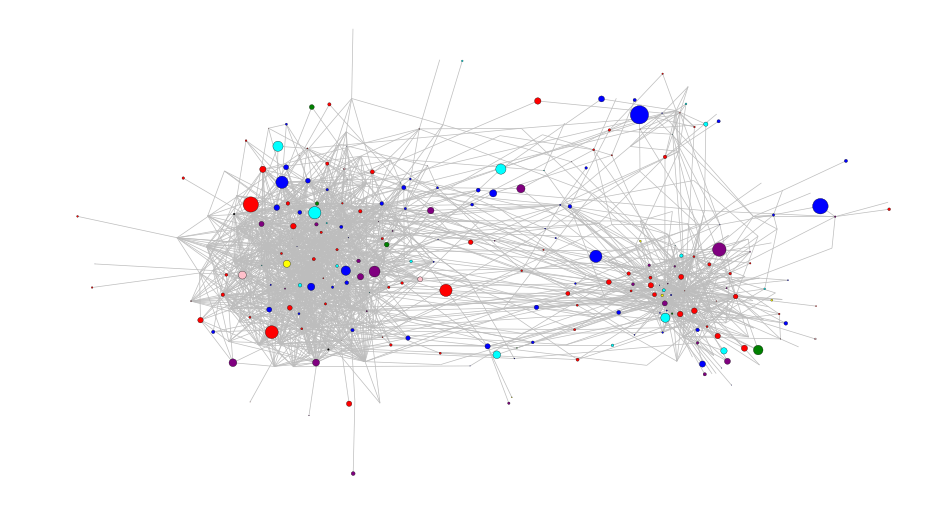

In [91]:
color_map = []
colors = ["red","blue","green","purple","cyan","pink","yellow","black"]

for p in community.best_partition(Gc).values():
  color_map.append(colors[p])
  

    
nx.draw_networkx(Gc, positions, width=0.7,edge_color = "#bdbdbd",  cmap=plt.get_cmap('jet'), node_size = [v * 3000 for v in list(dict_between.values())], with_labels=False, node_color = color_map)
ax = plt.gca() 
ax.collections[0].set_edgecolor("#000000")

plt.grid('off')
plt.axis('off')

plt.show()


It can be seen that the communnities are spread throughout the two main clusterings in the network produced by the Force Atlas algorithm


> * Compare the communities found by your algorithm with the parties by creating a matrix $\mathbf{D}$ with dimension $(B \times C$, where $B$ is the number of parties and $C$ is the number of communities. We set entry $D(i,j)$ to be the number of nodes that party $i$ has in common with community $j$. The matrix $\mathbf{D}$ is what we call a [**confusion matrix**](https://en.wikipedia.org/wiki/Confusion_matrix). 

In [14]:
D = np.zeros([2, max(partition.values())+1 ])

parties_dict = nx.get_node_attributes(G,"Party")

for p in parties_dict:
  i = 0 if parties_dict[p] == "Democratic" else 1
  j = partition[p]
  D[i][j] += 1
  
print D

[[112.   3.  41.   4.   1.   1.   7.   1.   2.   1.   1.   1.   0.   3.
    1.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   1.
    0.   0.   0.   0.   0.   0.   1.   0.   1.   0.   1.   0.   0.   1.
    1.   1.   0.   0.]
 [  1.   5.   9. 139.   0.   0.  28.  10.  11.   3.   1.   0.   1.   2.
    0.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.   0.
    1.   1.   1.   1.   1.   1.   0.   1.   0.   1.   0.   1.   1.   0.
    0.   0.   1.   1.]]


> * Plot the confusion matrix and explain how well the communities you've detected correspond to the parties. Consider the following questions:
>   * Are there any republicans grouped with democrats (and vice versa)?

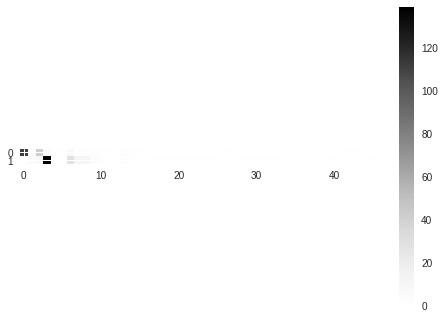

In [19]:
plt.imshow(D);
plt.colorbar()
plt.show()

There are a lot more communities than parties, which corresponds to all the outliers in the values that we saw earlier. There are, however, to big communities that correspond decently well to the parties. Community 0, the first community, seems to correspond mainly to Democrats, with 112 democrats and only 1 Republican. Community 3 correesponts mainly to Republicans, but still contains 4 Democrats, which is still rather insignificant compared to the 139 Republicans in this community. The rest of the communities seem to be somewhat evenly split between the two, however each of them still have significant majorities of one of the parties. No group seems to contain a somewhat even amount of members from each party.


>>   * Does the community detection algorithm sub-divide the parties? Do you know anything about American politics that could explain such sub-divisions? Answer in your own words.

While the American house of representatives only contains two parties, there are still coalitions within these parties that have slightly varying ideologies, while still remaining within the main parties message. One such subgroup is the New Democrat Coalition, which are more pro-businesses among other things. These coalitions could explain the different communities found by the algorithm.

# Part 2 - What do republican and democratic members tweet about?

In [ ]:
df_republican = df_republican.reset_index()
df_democratic = df_democratic.reset_index()


## _Exercise_ 4: TF-IDF of the republican and democratic tweets.
> We will create two documents, one containing the words extracted from tweets of republican members, and the other for Democratic members. We will then use TF-IDF to compare the content of these two documents and create a word-cloud. The procedure you should use is exactly the same you used in exercise 2 of week 7. The main steps are summarized below: 


> * Create two large documents, one for the democratic and one for the republican party. Tokenize the pages, and combine the tokens into one long list including all the pages of the members of the same party. 
>   * Exclude all twitter handles.
>   * Exclude punctuation.
>   * Exclude stop words (if you don't know what stop words are, go back and read NLPP1e again).
>   * Exclude numbers (since they're difficult to interpret in the word cloud).
>   * Set everything to lower case.
>   * Compute the TF-IDF for each document.


### Create two large documents

In [ ]:
################
#Republican
################

with open("drive/"+path_collab +'/tweets/republican.txt', 'w+') as outfile:
  for i in range(len(df_republican)):
    with io.open("drive/"+path_collab +'/tweets/'+df_republican.tw_name[i], 'r+', encoding="utf-8") as infile:
      for line in infile:
        outfile.write(line.encode('utf-8'))
        
################
#Democratic
################

with open("drive/"+path_collab +'/tweets/democratic.txt', 'w+') as outfile:
  for i in range(len(df_democratic)):
    with io.open("drive/"+path_collab +'/tweets/'+df_democratic.tw_name[i], 'r+', encoding="utf-8") as infile:
      for line in infile:
        outfile.write(line.encode('utf-8'))


In [ ]:
import io
raw_republican = io.open("drive/"+path_collab +'/tweets/republican.txt', 'r').read()
raw_democratic = io.open("drive/"+path_collab +'/tweets/democratic.txt', 'r').read()

### Exclude all twitter handles

In [ ]:
for i in range(len(df_republican)):
    raw_republican = re.sub("@"+df_republican.loc[i]["tw_name"], '', raw_republican)

for i in range(len(df_democratic)):
    raw_democratic = re.sub("@"+df_democratic.loc[i]["tw_name"], '', raw_democratic)

### Tokenization and REMOVING PUNCATION AND NUMBERS  and lowercase

In [ ]:
split = filter(None,re.findall("[a-zA-Z]*",raw_democratic))
democratic_split = [w.lower() for w in split]


split = filter(None,re.findall("[a-zA-Z]*",raw_republican))
republican_split = [w.lower() for w in split]


### REMOVING STOP WORDS

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = [x.lower() for x in stopwords.words('english')]
filtered_democratic = [w for w in democratic_split if not w in stop] 
filtered_republican = [w for w in republican_split if not w in stop]

### Stemming

In [ ]:
stems_democratic = [PorterStemmer().stem(item) for item in filtered_democratic]
stems_republican = [PorterStemmer().stem(item) for item in filtered_republican]

### Compute the TF-IDF for each document

In [33]:
import collections
import operator
count_democratic = collections.Counter(stems_democratic) 

dict_democratic_tf = {}
for word in count_democratic.most_common():
  dict_democratic_tf[word[0]] = float(word[1])/len(stems_democratic)

#print "Democratic top 5 terms: ",sorted(dict_democratic_tf.items(),key=operator.itemgetter(1))[-5:]

###################
###################

import collections
count_republican = collections.Counter(stems_republican) 

dict_republican_tf = {}
for word in count_republican.most_common():
  dict_republican_tf[word[0]] = float(word[1])/len(stems_republican)

  
#print "Republican top 5 terms: ", sorted(dict_republican_tf.items(),key=operator.itemgetter(1))[-5:]

###################
###################

dict_words = {}

for word in count_democratic.most_common():
  if word[0] in dict_words:
    dict_words[word[0]] += 1
  else:
    dict_words[word[0]] = 1
    
for word in count_republican.most_common():
  if word[0] in dict_words:
    dict_words[word[0]] += 1
  else:
    dict_words[word[0]] = 1

###################
###################

dict_idf = {}
for i in dict_words:
  dict_idf[i] = math.log(2/dict_words[i], 10) 
  
###################
###################

tf_idf_demo_dict = {}
tf_idf_rep_dict = {}
for i in dict_idf:
  if not dict_democratic_tf.get(i) == None:
    tf_idf_demo_dict[i] = dict_democratic_tf[i] * dict_idf[i]
  if not dict_republican_tf.get(i) == None:
    tf_idf_rep_dict[i] = dict_republican_tf[i] * dict_idf[i]

print "Top 5 terms according to the TF-IDF algorithm:\n"
print "Democrats:"
print sorted(tf_idf_demo_dict.items(),key=operator.itemgetter(1))[-5:]
print "\nRepublicans:"
print sorted(tf_idf_rep_dict.items(),key=operator.itemgetter(1))[-5:]
    

Top 5 terms according to the TF-IDF algorithm:

Democrats:
[(u'appropsdem', 5.309567964993599e-05), (u'hispaniccaucu', 5.771269527166956e-05), (u'nrdem', 6.059833003525304e-05), (u'officialcbc', 8.368340814392087e-05), (u'goptaxscam', 0.00020141730649812678)]

Republicans:
[(u'hascrepublican', 4.820729734719247e-05), (u'rohrabach', 4.8679917909419845e-05), (u'westerncaucu', 5.0570400158329356e-05), (u'foxbusi', 0.00013705996304593936), (u'taxcutsandjobsact', 0.00016069099115730823)]


> * Now, create word-cloud for each party. Are these topics less "boring" than the wikipedia topics? Why?  Comment on the results.

In [72]:
!pip install wordcloud

    100% |████████████████████████████████| 348kB 5.6MB/s 


In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [ ]:
drive_service = google_authenticate()
document = raw_republican
document2 = raw_democratic

#import image
image_file_republican = open("drive/"+path_collab +'/trump.png','r')
image_file_democratic = open("drive/"+path_collab +'/hillary.jpg','r')

# create mask
trump_mask = np.array(Image.open(image_file_republican))
hillary_mask = np.array(Image.open(image_file_democratic))

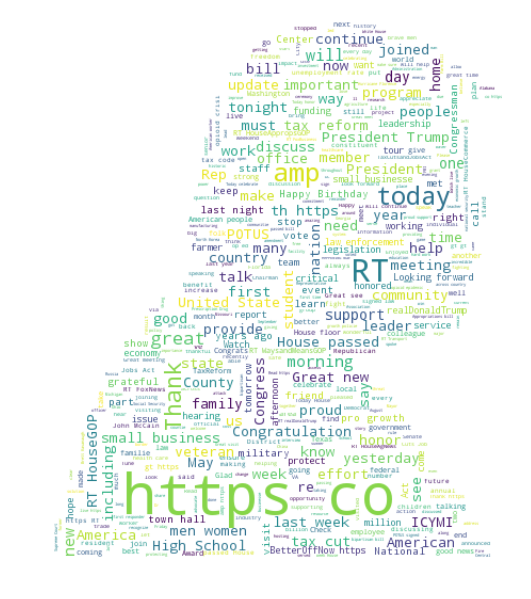

In [57]:
# generate word cloud republican
wc = WordCloud(background_color="white", max_words=2000, mask=trump_mask)
wc.generate(document)

# plot the word cloud
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

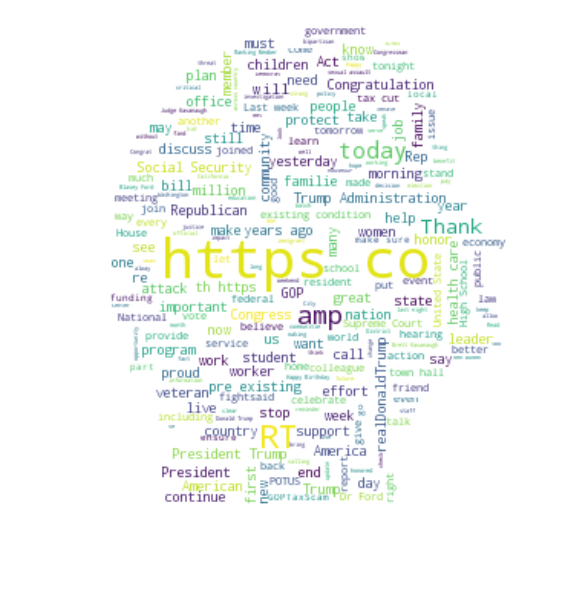

In [58]:
# generate word cloud republican
wc = WordCloud(background_color="white", max_words=2000, mask=hillary_mask)
wc.generate(document2)

# plot the word cloud
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

* Are these topics less "boring" than the wikipedia topics? Why? Comment on the results.
 

These topics are more opinion based and more relevant to the current social climate, and are thus more interesting to analyse in regards to real human communication.

# Part 3 - Sentiment analysis

## Exercise 5: Sentiment over the Twitter data.

> * Download the LabMT wordlist. It's available as supplementary material from [Temporal Patterns of Happiness and Information in a Global Social Network: Hedonometrics and Twitter](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0026752) (Data Set S1). Describe briefly how the list was generated.

In [15]:
uploaded = files.upload()
sentiment_data = pd.read_csv(io.StringIO(uploaded['Data_Set_S1.csv'].decode('utf-8')))

Saving Data_Set_S1.csv to Data_Set_S1.csv


They sent the words to users on Mechanical Turk, asking them to rate the words each on a nine point scale according to the happiness of the word. Doing this, they got 50 datapoints for each word, which is the list in the dataset. 


> * Based on the LabMT word list, write a function that calculates sentiment given a list of tokens (the tokens should be lower case, etc).

In [ ]:
# Calculates the average sentiment of the words in the list of tokens
def calculate_sentiment(tokens):
  # Running sum of average happiness rating for each of the words
  sum_happiness = 0
  for t in tokens:
    # Locate the current token in the sentiment dataset
    index = sentiment_data.loc[sentiment_data['word'] == t]["happiness_average"]
    if len(index.keys()) > 0:
      index = index.keys()[0]
    else:
      continue
    # Add the average happiness rating to the running sum
    happiness_average = sentiment_data.iloc[index]["happiness_average"]
    sum_happiness += happiness_average
  # Return the average of the running sum if any data is present, otherwise return 0
  return sum_happiness / len(tokens) if len(tokens) > 0 else 0


> * Create two lists: one including the tweets written by democratic members, and the other including the tweets written by republican members (in the text files, tweets are separated by newlines).

Note that for this exercise, we have chosen not to separate tweets individually, but rather by politician. This was done in an attempt to cut down on computation time, but also has the side effect of more simliar values in the sentiment analysis from tweet to tweet. It can be seen later, that we still get results that seem representative of happy and upset politicians by dividing in this manner.


> * Calculate the sentiment of each tweet and plot the distribution of sentiment for each of the two lists. Are there significant differences between the two? Which party post more positive tweets?

In [ ]:
tweets_republican = []
tweets_democratic = []

# Tokenize tweets into two arrays of arrays, divided by party
for i in range(len(df_republican)):
  with io.open("drive/"+path_collab +'/tweets/'+df_republican.tw_name[i], 'r+', encoding="utf-8") as infile:
    tokens = re.findall("\w+",infile.read())
    tweets_republican.append(tokens)

for i in range(len(df_democratic)):
  with io.open("drive/"+path_collab +'/tweets/'+df_democratic.tw_name[i], 'r+', encoding="utf-8") as infile:
    tokens = re.findall("\w+",infile.read())
    tweets_democratic.append(tokens)

In [ ]:
democratic_happiness = []
republican_happiness = []

for tweet in tweets_democratic:
  val = calculate_sentiment([x.lower() for x in tweet])
  if val > 0:
    democratic_happiness.append(val)

for tweet in tweets_republican:
  val = calculate_sentiment([x.lower() for x in tweet])
  if val > 0:
    republican_happiness.append(val)

In [ ]:
def frange(start, stop, step):
  i = start
  while i < stop:
    yield i
    i += step

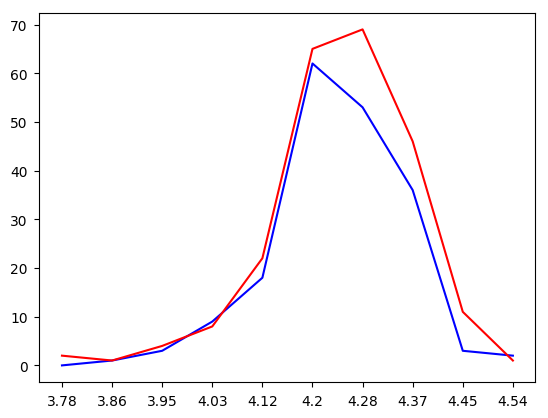

In [151]:
democratic_happiness_rounded = [round(x,2) for x in democratic_happiness]
republican_happiness_rounded = [round(x,2) for x in republican_happiness]

import numpy
max_val = max( max(democratic_happiness_rounded), max(republican_happiness_rounded) )
min_val = min( min(democratic_happiness_rounded), min(republican_happiness_rounded) )

bins=list(frange(min_val,max_val,(max_val-min_val)/10))
hist_dem, bin_edges = numpy.histogram(democratic_happiness_rounded, bins=bins)
hist_rep, bin_edges = numpy.histogram(republican_happiness_rounded, bins=bins)

plt.xticks(np.arange(len(list(bins))),[round(x,2) for x in list(bin_edges)])


plt.tick_params(direction='out', pad=5)
plt.plot(list(hist_dem), color="blue")
plt.plot(list(hist_rep), color="red")
plt.show()

Democrats and Republicans are generally equally positive, howeer there are more republicans in the higher ranges of happiness relative to democrats.

> * Compute the average *m* and standard deviation $\sigma$  of the tweets sentiment (considering tweets by both republican and democrats). 

In [22]:
!pip install statistics

    100% |████████████████████████████████| 552kB 5.6MB/s 
  Running setup.py bdist_wheel for statistics ... done
  Stored in directory: /root/.cache/pip/wheels/75/55/90/73aa7662bfb4565b567618547a275f01372a678ca92ecd64f3
Successfully built statistics


In [23]:

import statistics

m_dem = sum(democratic_happiness)/len(democratic_happiness)
m_rep = sum(republican_happiness)/len(republican_happiness)
stdev_dem = statistics.stdev(democratic_happiness)
stdev_rep = statistics.stdev(republican_happiness)

print "The mean positivity for democrats is " + str(round(m_dem,2)) + " and the standard deviation is " + str(round(stdev_dem,2))
print "The mean positivity for republicans is " + str(round(m_rep,2)) + " and the standard deviation is " + str(round(stdev_rep,2))

The mean positivity for democrats is 4.29 and the standard deviation is 0.11
The mean positivity for republicans is 4.29 and the standard deviation is 0.12



> * Now consider only tweets with sentiment lower than m-2$\sigma$. We will refer to them as _negative_ tweets.  Build a list containing the _negative_ tweets written by democrats, and one for republicans. Compute the TF-IDF for these two lists (use the same pre-processing steps in Exercise 5). Create a word-cloud for each of them. Are there differences between the negative contents posted by republicans and democrats?

In [ ]:
neg_dem = {}
pos_dem = {}
neg_rep = {}
pos_rep = {}

for i in range(len(democratic_happiness)):
  if democratic_happiness[i] < (m_dem-2*stdev_dem):
    neg_dem[i] = democratic_happiness[i]
  elif democratic_happiness[i] > (m_dem+2*stdev_dem):
    pos_dem[i] = democratic_happiness[i]

for i in range(len(republican_happiness)):
  if republican_happiness[i] < (m_rep-2*stdev_rep):
    neg_rep[i] = republican_happiness[i]
  elif republican_happiness[i] > (m_rep+2*stdev_rep):
    pos_rep[i] = republican_happiness[i]

In [41]:
print neg_dem
print neg_rep

{66: 3.8939469434832468, 131: 3.9995569467854266, 135: 4.050507897934363, 40: 4.004950980392138, 115: 3.9995887850467065, 23: 4.057845673505787, 57: 4.0488518765267285}
{101: 3.7844705155912224, 81: 3.925962389380507, 8: 3.980325612621664, 11: 4.029330959043474, 206: 4.002192638997605, 88: 4.004780733285388, 24: 3.8028367134685284, 103: 4.052858617131018, 223: 4.047443742098579}


In [ ]:
def flatten_to_strings(listOfLists):
    result = []

    for i in listOfLists:
        # Only append if i is a basestring (superclass of string)
        if isinstance(i, basestring):
            result.append(i)
        # Otherwise call this function recursively
        else:
            result.extend(flatten_to_strings(i))
    return result

In [ ]:
negative_democratic_tweets = []
negative_republican_tweets = []
for i in neg_dem.keys():
  negative_democratic_tweets.extend(tweets_democratic[i])
for i in neg_rep.keys():
  negative_republican_tweets.extend(tweets_republican[i])
  
# REMOVING TWITTER HANDLES
for i in range(len(df_republican)):
    negative_republican_tweets_filtered = filter(lambda a: not a in df_republican.loc[i]["tw_name"],negative_republican_tweets)

for i in range(len(df_democratic)):
    negative_democratic_tweets_filtered = filter(lambda a: not a in df_democratic.loc[i]["tw_name"],negative_democratic_tweets)

In [ ]:
# REMOVING STOPWORDS
stop = [x.lower() for x in stopwords.words('english')]
filtered_democratic_tweets = [w for w in negative_democratic_tweets_filtered if not w in stop] 
filtered_republican_tweets = [w for w in negative_republican_tweets_filtered if not w in stop]

In [ ]:
# STEMMING
stems_democratic = [PorterStemmer().stem(item) for item in filtered_democratic_tweets]
stems_republican = [PorterStemmer().stem(item) for item in filtered_republican_tweets]

In [71]:
import collections
import operator
count_democratic = collections.Counter(stems_democratic) 

dict_democratic_tf = {}
for word in count_democratic.most_common():
  dict_democratic_tf[word[0]] = float(word[1])/len(stems_democratic)

#print "Democratic top 5 terms: ",sorted(dict_democratic_tf.items(),key=operator.itemgetter(1))[-5:]

###################
###################

import collections
count_republican = collections.Counter(stems_republican) 

dict_republican_tf = {}
for word in count_republican.most_common():
  dict_republican_tf[word[0]] = float(word[1])/len(stems_republican)

  
#print "Republican top 5 terms: ", sorted(dict_republican_tf.items(),key=operator.itemgetter(1))[-5:]

###################
###################

dict_words = {}

for word in count_democratic.most_common():
  if word[0] in dict_words:
    dict_words[word[0]] += 1
  else:
    dict_words[word[0]] = 1
    
for word in count_republican.most_common():
  if word[0] in dict_words:
    dict_words[word[0]] += 1
  else:
    dict_words[word[0]] = 1

###################
###################

dict_idf = {}
for i in dict_words:
  dict_idf[i] = math.log(2/dict_words[i], 10) 
  
###################
###################

tf_idf_demo_dict = {}
tf_idf_rep_dict = {}
for i in dict_idf:
  if not dict_democratic_tf.get(i) == None:
    tf_idf_demo_dict[i] = dict_democratic_tf[i] * dict_idf[i]
  if not dict_republican_tf.get(i) == None:
    tf_idf_rep_dict[i] = dict_republican_tf[i] * dict_idf[i]

print "Top 5 terms according to the TF-IDF algorithm:\n"
print "Democrats:"
print sorted(tf_idf_demo_dict.items(),key=operator.itemgetter(1))[-5:]
print "\nRepublicans:"
print sorted(tf_idf_rep_dict.items(),key=operator.itemgetter(1))[-5:]
    

Top 5 terms according to the TF-IDF algorithm:

Democrats:
[(u'reproybalallard', 0.0003932367256726252), (u'nitalowey', 0.00043692969519180583), (u'hawaii', 0.0006262658964415883), (u'repdarrensoto', 0.0009321166830758525), (u'repespaillat', 0.0012088388233639962)]

Republicans:
[(u'2018farmbil', 0.0005073678295742509), (u'conawaytx11', 0.0005939916053552206), (u'griffith', 0.000791988807140294), (u'houseagnew', 0.0008538629326981295), (u'rohrabach', 0.0012869818116029777)]


In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

drive_service = google_authenticate()
document = raw_republican
document2 = raw_democratic

#import image
image_file_republican = open("drive/"+path_collab +'/trump.png','r')
image_file_democratic = open("drive/"+path_collab +'/hillary.jpg','r')

# create mask
trump_mask = np.array(Image.open(image_file_republican))
hillary_mask = np.array(Image.open(image_file_democratic))


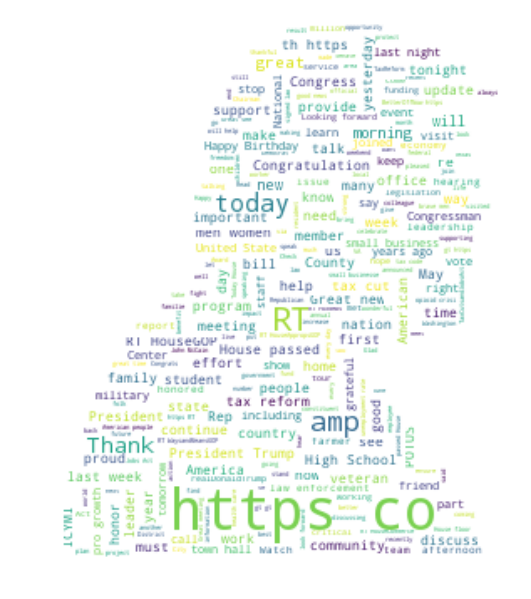

In [74]:
# generate word cloud republican
wc = WordCloud(background_color="white", max_words=2000, mask=trump_mask)
wc.generate(document)

# plot the word cloud
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

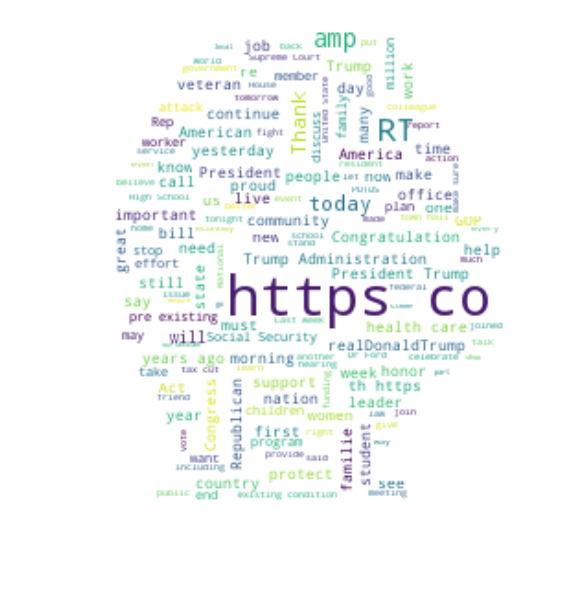

In [75]:
# generate word cloud democratic
wc = WordCloud(background_color="white", max_words=2000, mask=hillary_mask)
wc.generate(document2)

# plot the word cloud
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Democrats have a lot of negative tweets including Trump and his presidency. Other than that, the most prevalent words such as *today* are present in both word clouds.


> * Repeat the point above, but considering _positive_ tweets instead (e.g. with sentiment larger than m+2$\sigma$). Comment on your results.


In [78]:
print pos_dem
print pos_rep

{92: 4.616767399267389, 65: 4.547033348772539, 2: 4.567865880297057, 4: 4.5076092983578375, 81: 4.5260271275431965}
{124: 4.621116716349447, 76: 4.541348314606721}


In [ ]:
positive_democratic_tweets = []
positive_republican_tweets = []
for i in pos_dem.keys():
  positive_democratic_tweets.extend(tweets_democratic[i])
for i in pos_rep.keys():
  positive_republican_tweets.extend(tweets_republican[i])
  
# REMOVING TWITTER HANDLES
for i in range(len(df_republican)):
    positive_republican_tweets_filtered = filter(lambda a: not a in df_republican.loc[i]["tw_name"],positive_republican_tweets)

for i in range(len(df_democratic)):
    positive_democratic_tweets_filtered = filter(lambda a: not a in df_democratic.loc[i]["tw_name"],positive_democratic_tweets)

In [ ]:
# REMOVING STOPWORDS
stop = [x.lower() for x in stopwords.words('english')]
filtered_democratic_tweets = [w for w in positive_democratic_tweets_filtered if not w in stop] 
filtered_republican_tweets = [w for w in positive_republican_tweets_filtered if not w in stop]

In [ ]:
# STEMMING
stems_democratic = [PorterStemmer().stem(item) for item in filtered_democratic_tweets]
stems_republican = [PorterStemmer().stem(item) for item in filtered_republican_tweets]

In [81]:
import collections
import operator
count_democratic = collections.Counter(stems_democratic) 

dict_democratic_tf = {}
for word in count_democratic.most_common():
  dict_democratic_tf[word[0]] = float(word[1])/len(stems_democratic)

#print "Democratic top 5 terms: ",sorted(dict_democratic_tf.items(),key=operator.itemgetter(1))[-5:]

###################
###################

import collections
count_republican = collections.Counter(stems_republican) 

dict_republican_tf = {}
for word in count_republican.most_common():
  dict_republican_tf[word[0]] = float(word[1])/len(stems_republican)

  
#print "Republican top 5 terms: ", sorted(dict_republican_tf.items(),key=operator.itemgetter(1))[-5:]

###################
###################

dict_words = {}

for word in count_democratic.most_common():
  if word[0] in dict_words:
    dict_words[word[0]] += 1
  else:
    dict_words[word[0]] = 1
    
for word in count_republican.most_common():
  if word[0] in dict_words:
    dict_words[word[0]] += 1
  else:
    dict_words[word[0]] = 1

###################
###################

dict_idf = {}
for i in dict_words:
  dict_idf[i] = math.log(2/dict_words[i], 10) 
  
###################
###################

tf_idf_demo_dict = {}
tf_idf_rep_dict = {}
for i in dict_idf:
  if not dict_democratic_tf.get(i) == None:
    tf_idf_demo_dict[i] = dict_democratic_tf[i] * dict_idf[i]
  if not dict_republican_tf.get(i) == None:
    tf_idf_rep_dict[i] = dict_republican_tf[i] * dict_idf[i]

print "Top 5 terms according to the TF-IDF algorithm:\n"
print "Democrats:"
print sorted(tf_idf_demo_dict.items(),key=operator.itemgetter(1))[-5:]
print "\nRepublicans:"
print sorted(tf_idf_rep_dict.items(),key=operator.itemgetter(1))[-5:]
    

Top 5 terms according to the TF-IDF algorithm:

Democrats:
[(u'michigan', 0.0005912485885656196), (u'ago', 0.0006123646095858202), (u'wisconsin', 0.0008024087987676265), (u'paso', 0.000971336966929232), (u'hall', 0.001604817597535253)]

Republicans:
[(u'rephensarl', 0.0008008779399108244), (u'taxreform', 0.001051152296132957), (u'financialcmt', 0.001051152296132957), (u'wichita', 0.0012513717811106632), (u'kansa', 0.00130142665235509)]


In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

drive_service = google_authenticate()
document = raw_republican
document2 = raw_democratic

#import image
image_file_republican = open("drive/"+path_collab +'/trump.png','r')
image_file_democratic = open("drive/"+path_collab +'/hillary.jpg','r')

# create mask
trump_mask = np.array(Image.open(image_file_republican))
hillary_mask = np.array(Image.open(image_file_democratic))


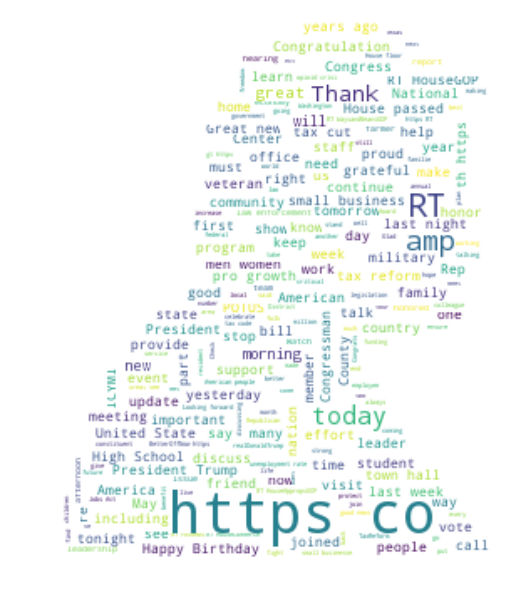

In [84]:
# generate word cloud republican
wc = WordCloud(background_color="white", max_words=2000, mask=trump_mask)
wc.generate(document)

# plot the word cloud
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

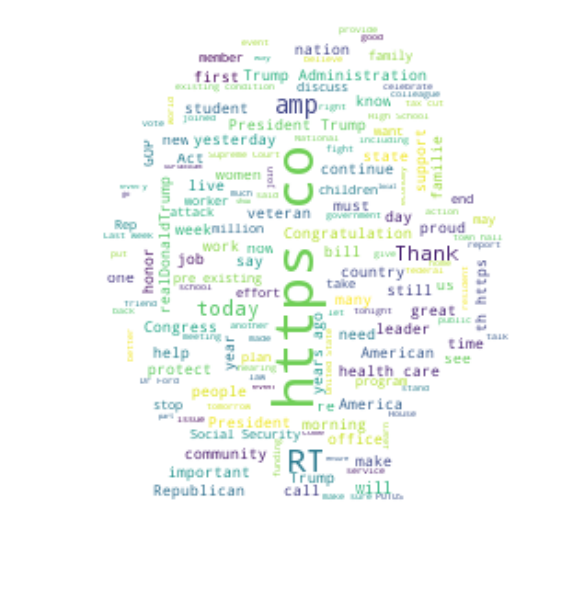

In [85]:
# generate word cloud democratic
wc = WordCloud(background_color="white", max_words=2000, mask=hillary_mask)
wc.generate(document2)

# plot the word cloud
plt.figure(figsize=(8,6), dpi=120)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Here we see much more similar words between democrats and republicans, with no real stand-outs for each of them. It can be seen that the most positive tweets for both parties express thanks.